In [1]:
import gmaps

In [31]:
import numpy as np
import pandas as pd
import requests
import time
# Dependencies
import requests
import json
# Google developer API key
from config import gkey
# Retrieve Google API key from config.py
from uszipcode import SearchEngine
import matplotlib.pyplot as plt
import time
homeless_df=pd.read_csv('homelessDataCsvByZipCode.csv')

In [43]:

de = homeless_df.drop(homeless_df.columns[0], axis = 1) 
de.set_index('address').sum()
#homeless_df.set_index('address')

count    90178
dtype: int64

In [47]:
de[['address','count']].groupby('address')

In [63]:
dataClenedAfter = de[['address','count']].groupby('address').sum().reset_index()

In [64]:
list(dataClenedAfter)



'for index, row in dataClenedAfter.iterrows():\n    print(row)\n    print("-----")'

In [99]:
dataHomeLess = []
for index, row in dataClenedAfter.iterrows():
    try:
        zip = int(row['address'].split(",")[len(row['address'].split(","))-2].replace("CA","").strip())
        dataHomeLess.append([zip,row['count']])
    except:
        print("error")

error
error
error


In [100]:

zipCodeHomeLess = pd.DataFrame(dataHomeLess)

In [101]:
zipCodeHomeLess.columns = ['zip', 'count homeless']

In [102]:
marijuana_df=pd.read_csv('CannabisLicData_cleaned.csv')
marijuana_zip=marijuana_df['Zip Code'].value_counts()
marijuana_zip.sort_index(inplace=True)
marijuana_zipDataFrame = marijuana_zip.to_frame().reset_index()
marijuana_zipDataFrame.columns = ['zip', 'count ']

In [106]:
newData = pd.merge(zipCodeHomeLess, marijuana_zipDataFrame, on='zip', how='outer')


In [120]:
dataHomeLessAndPot = []
newData.fillna(0)
zipCodesValid=pd.read_csv('laZipCodes.csv', encoding = "ISO-8859-1")

for index, row in newData.iterrows():
    if row['zip'] < 91608 :
        dataHomeLessAndPot.append([row['zip'],row['count'],row['count homeless']])
pddataHomeLessAndPot=pd.DataFrame(dataHomeLessAndPot)        

pddataHomeLessAndPot.columns = ['zip','count disp', 'count homeless']

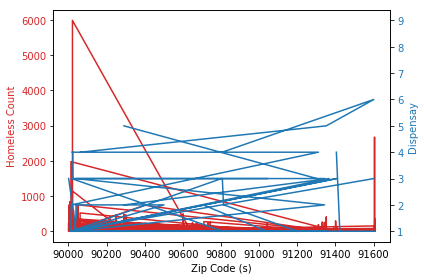

In [123]:
"""
plt.figure(0)
unemployed, = plt.plot(newData['zip'], newData['count homeless'], marker ='o', color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
plt.figure(1)
weed, = plt.plot(newData['zip'], newData['count'], marker='^', color='red', label="Cosine")"""



# Create some mock data
t = pddataHomeLessAndPot['zip']
data1 = pddataHomeLessAndPot['count homeless']
data2 = pddataHomeLessAndPot['count disp']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Zip Code (s)')
ax1.set_ylabel('Homeless Count', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dispensay', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
